In [10]:
from bs4 import BeautifulSoup
import requests
import multiprocessing as mp
import pandas as pd
import re
from nltk.stem import RSLPStemmer
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [11]:
def getPage(url):
    html = requests.get(url).content
    soup = BeautifulSoup(html, 'html.parser')
    links = soup.findAll('a')
    return list(dict.fromkeys([link.get('href') for link in links if link.get('title') != None and link.get('href') != None and str(link.get('title')).startswith('#Verificamos:')]))

In [12]:
def get_is_fake_and_text(url): 
    try:
        resp = requests.get(url)
        if(resp.status_code != 200):
            raise Exception('Error executing http call')

        html = resp.content
        soup = BeautifulSoup(html, 'html.parser')
        div_post_inner = soup.find('div', {'class': 'post-inner'})
        div_b_text = div_post_inner.findChildren('div', {'class': 'etiqueta etiqueta-7'})[0].text

        is_fake = True
        if div_b_text == 'VERDADEIRO':
            raise Exception('Not fake')
        elif div_b_text == 'FALSO':  
            is_fake = False
        else:
            raise Exception('Not parseable')

        ps = div_post_inner.findAll('p', recursive=False)
        p_tag = ps[2].text
        return (is_fake, p_tag)
    except Exception as e:
        print('##### ERROR - ' + str(e))
        return (None, None)

In [13]:
base_url = "https://piaui.folha.uol.com.br/lupa/page/"
pool = mp.Pool(mp.cpu_count())

v_links = []
pages = []
for i in range(1, 366):
    pages.append(base_url + str(i) + "/")

results = [pool.apply(getPage, args=((p,))) for p in pages]
pool.close()  
[v_links.extend(r) for r in results]
v_links = list(dict.fromkeys(v_links))

In [14]:
df = pd.DataFrame(v_links)
df.to_csv('generated/piaui_verified_links.csv', index=False)

In [15]:
pool = mp.Pool(mp.cpu_count())
results_get_fake = [pool.apply(get_is_fake_and_text, args=((p,))) for p in v_links]
pool.close()  

df = pd.DataFrame(results_get_fake)
df.to_csv('generated/results_get_fake.csv', index=False)

##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - Error executing http call
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERROR - list index out of range
##### ERRO

In [21]:
df = pd.read_csv('generated/results_get_fake.csv')

df['0'] = df['0'].astype(bool)
df['1'] = df['1'].astype(str)
df = df[df['0'] == False]

df.info()
print(df['0'].value_counts())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1917 entries, 0 to 1976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1917 non-null   bool  
 1   1       1917 non-null   object
dtypes: bool(1), object(1)
memory usage: 31.8+ KB
False    1917
Name: 0, dtype: int64


,0,1
0,False,"“Câncer no seio não precisa mais fazer cirurgia. Presidente Bolsonaro vai autorizar a importação dessa tecnologia de Israel. Embora chamado de machista, foi o único presidente que se lembrou em primeiro lugar das mulheres… Vamos divulgar!!”\nLegenda de post publicado no Facebook que, até as 18h de 18 de outubro de 2021, tinha 24 compartilhamentos\n"
2,False,"“A filha de uma amiga minha ganhou essa boneca linda de aniversário da tia. Ela veio com essa roupinha. A boneca é uma menina, né, veio com um vestido. Nada na caixa identificava coisa diferente. A criança tem 6 anos de idade, quando ela foi tirar a roupa da boneca, que ela tem costume tirar da roupa e dar banho, brincar… (…) a boneca tá sem a calcinha. Olha o que que a boneca tem. Ela tem um piu-piu e tem o ânus (…) Olha o que é a ideologia de gênero”\nVídeo que circula pelo WhatsApp\n"
3,False,"“Você sabe o que é isso? Aqui em Pernambuco, Santa Cruz do Capibaribe, o MST foi destruir as casas que seriam entregues para as pessoas mais pobres, famílias carentes (…)”\n\nConteúdo de vídeo que circula em correntes de WhatsApp\n"
4,False,"“UNIÃO EUROPEIA SUBSTITUIRÁ VACINAS POR IVERMECTINA\nBoas notícias para quem não gosta da vacina covid-19: […] Todas as vacinas não serão mais aprovadas a partir de 20 de outubro de 2021. A União Europeia aprovou cinco terapias que estarão disponíveis em todos os hospitais dos Estados-Membros para o tratamento de covid-19.”\nTrecho de texto que, até 18h do dia 15 de outubro de 2021, havia sido compartilhado por 200 usuários no Facebook\n"
5,False,"Título de texto publicado no site Stylo Urbano e que, até às 19h do dia 15 de outubro de 2021, tinha sido compartilhado por 84 pessoas no Facebook\n"
6,False,"“Infelizmente acaba de chegar triste notícia sobre o ator Murilo Rosa aos 51 anos: ‘Descanse em paz’”\nTítulo de texto publicado pelo site Notícia Relevante que, até as 17h de 15 de outubro de 2021, tinha 457 compartilhamentos no Facebook\n"
7,False,"“FMI: Inflação global deve atingir seu pico nos últimos meses de 2021, mas Brasil se destaca em controle”\n"
8,False,“NOVAS MULTAS VALENDO A PARTIR DE HOJE:\n
9,False,"“Tabata Amaral criadora da PL dos absorventes teve sua campanha financiada pelo empresário Jorge Paulo Lemann, que por coincidência pertence á empresa P&G que fabrica absorventes”\nTexto que circula em correntes de WhatsApp\n"
10,False,FALSO\n


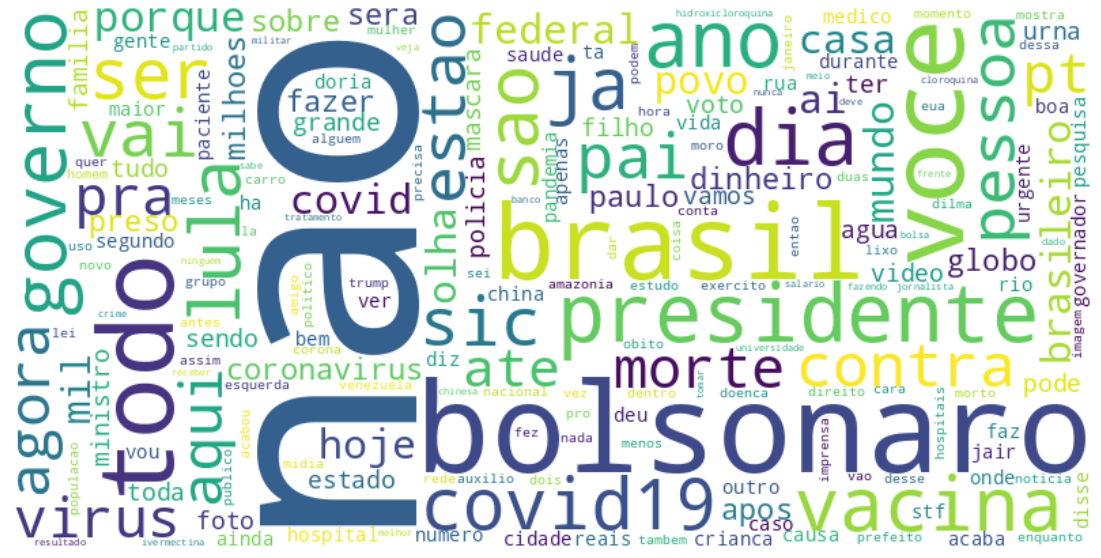

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1340 non-null   bool  
 1   1       1340 non-null   object
dtypes: bool(1), object(1)
memory usage: 22.2+ KB
False    1340
Name: 0, dtype: int64


,0,1
0,False,canc sei nao precis faz cirurg presid bolsonar vai autor importaca dess tecnolog israel emb cham mach unic presid lembr prim lug mulh vam divulg
2,False,filh amig ganh bonec lind aniversari tia vei roup bonec menin ne vei vest nad caix identific cois difer crianc 6 ano idad tir roup bonec costum tir roup dar banh brinc bonec ta calc olh bonec piup anu olh ideolog gener
3,False,voc sab aqu pernambuc sant cruz capibarib mst destru cas entreg pesso pobr famil carent
5,False,unia europe substitu vacin ivermectin boa notic nao gost vacin covid19 tod vacin nao sera aprov part 20 outubr 2021 unia europe aprov cinc terap estara disponi tod hospit estadosmembr trat covid19
6,False,infeliz acab cheg trist notic sobr at muril ros 51 ano descans paz
8,False,fmi inflaca glob dev ating pic ult mes 2021 brasil destac control
10,False,tabat amar cri pl absorv campanh financi empresari jorg paul lemann coincidenc pertenc empr pg fabr absorv
12,False,olh carrefour bruxel europ pal riquiss nao com econom gent ve agradec brasil porqu aind sub pouc aliment aind compr viv brasil bolsonarotemraza
14,False,ilh pequenin aqu rapaz trat zoolog sao paul filh ded lul enta don dess ilh aqu iat ai voc esta vend ai bel pr ind dinh simpl assim so coloc pai analfabet ser presid republ fic aqu conhec ilh palm aqu angr reil ilh luci huck compr lul dinh jb r 500 milho
15,False,medic dire hospit irland avis bill gat gav ira lanc nov epidem cham marburg


In [22]:
remove_pontuacao = lambda x:  re.sub(r'[^\w\s]', '', x)
remove_nao_citacao = lambda x: x if x.startswith('“') else ''
remove_quebra_linha = lambda x:  re.sub(r'\\n', ' ', x)
remove_tabulacao = lambda x:  re.sub(r'\\t', ' ', x)
remove_multiplos_espacos = lambda x:  re.sub(' +', ' ', x)
get_between_markers = lambda x: '' if x.find('”') == -1 else x[x.find('“')+1: x.find('”')]
remove_little = lambda x: '' if len(x.split(' ')) < 10 else x

stemmer = RSLPStemmer()
stopws = stopwords.words('portuguese')

df['1'] = df['1'].map(remove_quebra_linha).map(remove_tabulacao).map(remove_multiplos_espacos).map(remove_nao_citacao).map(get_between_markers).map(remove_little).map(remove_pontuacao)

df.replace('FALSO', '', inplace=True)
df['1'] = df['1'].str.lower()
df['1'] = df['1'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df['1'] = df['1'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopws)]))
df['1'] = df['1'].str.strip()

df.replace('', None, inplace=True)
df.drop_duplicates(subset='1', keep='last', inplace=True)
df.dropna(inplace=True)
df['1'] = df['1'].str.lower()
df['1'] = df['1'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

words = " ".join(df['1'])
word_cloud = WordCloud(width=800, height=400, collocations = False, background_color = 'white').generate(words)
plt.figure( figsize=(20,10) )
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

df['1'] = df['1'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x.split(' ')]))
df.to_csv('generated/results_get_fake_built.csv', index=False)
df.info()
print(df['0'].value_counts())
df.head(10)